<a href="https://colab.research.google.com/github/Shah-in-alam/AI-Basic-to-Advance/blob/main/CNN_(Convolutional_Neural_Network).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#What is CNN ?
A convolutional Neural Network(CNN) is a deep learning model specially designed to process grid-like data, such as images. it is particularly powerful for image classification, object detection, and image segmentation.

🔍 Key Concepts:
Layer Type	Description
Convolutional Layer	Applies filters (kernels) to input image to extract features like edges, shapes, etc.
Activation Function (ReLU)	Introduces non-linearity, so model can learn complex patterns.
Pooling Layer (MaxPooling)	Downsamples feature maps to reduce dimensionality and computation.
Flatten Layer	Converts 2D data into 1D to pass into dense layers.
Fully Connected (Dense) Layer	Performs final classification using output from conv layers.
Softmax Layer	Converts final output into probability for each class.



In [10]:
pip install tensorflow matplotlib


#Basic CNN Example (MNIST)

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [12]:
# Load and preprocess data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train[..., tf.newaxis] / 255.0
x_test = x_test[..., tf.newaxis] / 255.0

#Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes
])

#Compile and train
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

#Evaluate
test_loss,test_acc=model.evaluate(x_test,y_test)
print(f"Test accuracy:{test_acc}:.2f")





/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 31ms/step - accuracy: 0.9026 - loss: 0.3265 - val_accuracy: 0.9836 - val_loss: 0.0517
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 29ms/step - accuracy: 0.9853 - loss: 0.0475 - val_accuracy: 0.9886 - val_loss: 0.0355
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9902 - loss: 0.0306 - val_accuracy: 0.9912 - val_loss: 0.0292
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9928 - loss: 0.0222 - val_accuracy: 0.9893 - val_loss: 0.0349
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 87s 32ms/step - accuracy: 0.9946 - loss: 0.0157 - val_accuracy: 0.9905 - val_loss: 0.0286
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9865 - loss: 0.0373
Test accuracy:0.9904999732971191:.2f


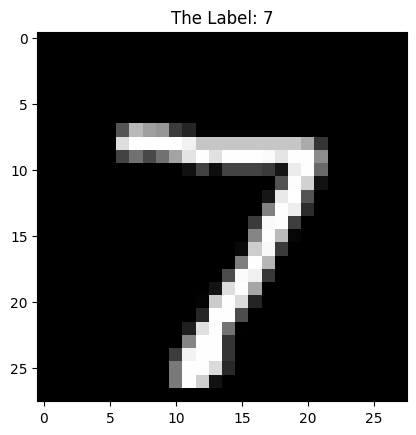

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
Predicted label: 7


In [13]:
import numpy as np

#Predict one image
index=0
img=x_test[index]
plt.imshow(img.squeeze(),cmap='gray')
plt.title("The Label: "+str(y_test[index]))
plt.show()
pred=model.predict(np.expand_dims(img,axis=0))
print("Predicted label:", np.argmax(pred))

Part 3: Advanced CNN -Add Dropout, BatchNorm, and Callbacks

In [15]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#Add early stopping
callback=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3)
model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test),callbacks=[callback])
test_loss,test_acc=model.evaluate(x_test,y_test)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 93s 48ms/step - accuracy: 0.8325 - loss: 0.5739 - val_accuracy: 0.9838 - val_loss: 0.0534
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 97s 52ms/step - accuracy: 0.9632 - loss: 0.1332 - val_accuracy: 0.9876 - val_loss: 0.0420
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 148s 55ms/step - accuracy: 0.9717 - loss: 0.1006 - val_accuracy: 0.9895 - val_loss: 0.0374
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 97s 52ms/step - accuracy: 0.9764 - loss: 0.0825 - val_accuracy: 0.9890 - val_loss: 0.0388
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 134s 47ms/step - accuracy: 0.9785 - loss: 0.0756 - val_accuracy: 0.9900 - val_loss: 0.0388
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9869 - loss: 0.0500


✅ 2. Load & Prepare Dataset (use small set of cats & dogs)

In [7]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16

# ✅ 1. Download and unzip the dataset
url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
zip_path = tf.keras.utils.get_file("cats_and_dogs_filtered.zip", origin=url, extract=False)

# ✅ 2. Unzip manually
extract_path = os.path.join(os.path.dirname(zip_path), "cats_and_dogs_filtered")
if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(os.path.dirname(zip_path))

# ✅ 3. Set directory paths
base_dir = extract_path
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')

# ✅ 4. Image preprocessing
IMG_SIZE = (150, 150)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_gen = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


✅ 4. Load VGG16 Base Model (no top)

In [17]:
base_model=VGG16(input_shape=(150,150,3),include_top=False,weights='imagenet')
#Freeze base model layesr
base_model.trainable = False

✅ 5. Add Custom Classification Head

In [18]:

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 2,097,665 (8.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

✅ 6. Train the Model

In [ ]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=5
)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


45/63 ━━━━━━━━━━━━━━━━━━━━ 2:32 8s/step - accuracy: 0.6652 - loss: 1.0385

🔁 Optional: Fine-tune Top Layers

In [2]:
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(input_shape=(150,150,3), include_top=False, weights='imagenet')


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
